In [1]:
# import required packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

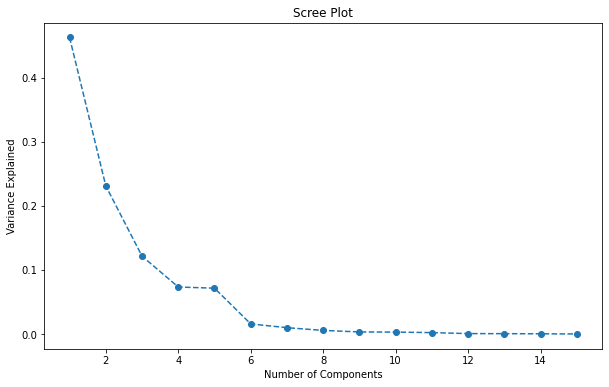

In [6]:
# Generate Scree Plot

# Load the CSV file
dir = os.getcwd()
file_path = dir + "/combined_final.csv" 
data = pd.read_csv(file_path)

# Dropping non-numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Creating a Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

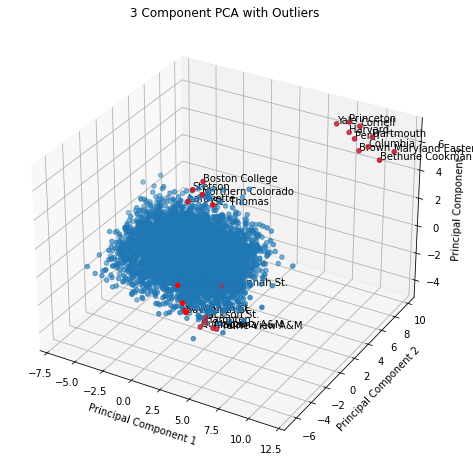

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
25,2014,Boston College,62.7157,331,61.2276,321,107.4730,105,114.2900,32,116.3700,345,111.8490,294,2.440890,142
543,2015,Lafayette,64.5845,189,64.5616,160,112.6540,19,112.9250,38,112.8320,344,115.0620,338,-2.136500,193
602,2015,Northern Colorado,64.1568,215,63.1568,247,113.0530,15,110.4210,63,114.2240,349,117.8750,349,-7.454160,252
957,2017,Savannah St.,82.9977,1,81.0113,1,101.3610,217,100.6010,248,109.7270,306,114.7420,333,-14.141000,317
996,2017,The Citadel,80.6715,2,79.7419,2,104.4400,156,105.5190,150,116.0820,346,116.5450,340,-11.025800,288
1628,2012,Prairie View A&M,71.3914,23,70.0015,16,85.8993,339,85.5117,344,94.7858,56,103.5210,187,-18.009600,322
1956,2013,Savannah St.,62.9356,297,61.8038,286,86.1886,340,88.2264,337,86.7511,3,91.8086,22,-3.582220,208
2021,2013,Hampton,68.9391,52,68.7048,26,89.1159,329,89.1826,336,91.2553,17,99.3956,113,-10.213000,273
2099,2011,Alabama A&M,71.2373,27,69.6923,26,87.9417,335,87.0328,339,93.1090,15,103.6850,179,-16.651900,323
2757,2010,VMI,84.9602,1,83.3826,1,101.1470,169,102.3640,178,114.4370,345,120.4610,347,-18.096700,317


In [7]:
# Dropping non-numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA for three components
pca_3 = PCA(n_components=3)
pca_data_3 = pca_3.fit_transform(scaled_data)

# Standard deviations for outlier detection
std_devs = 3

# Identifying outliers
outliers = np.where(np.any(np.abs(pca_data_3) > std_devs * np.std(pca_data_3, axis=0), axis=1))

# Creating a 3D plot for the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three PCA components
ax.scatter(pca_data_3[:, 0], pca_data_3[:, 1], pca_data_3[:, 2])

# Highlighting outliers
ax.scatter(pca_data_3[outliers, 0], pca_data_3[outliers, 1], pca_data_3[outliers, 2], color='r')

# Annotate the outliers
for outlier in outliers[0]:
    ax.text(pca_data_3[outlier, 0], pca_data_3[outlier, 1], pca_data_3[outlier, 2], 
            '%s' % (data.iloc[outlier]['TeamName']), size=10, zorder=1, color='k')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3 Component PCA with Outliers')

plt.show()

# Displaying the details of outliers
data.iloc[outliers]

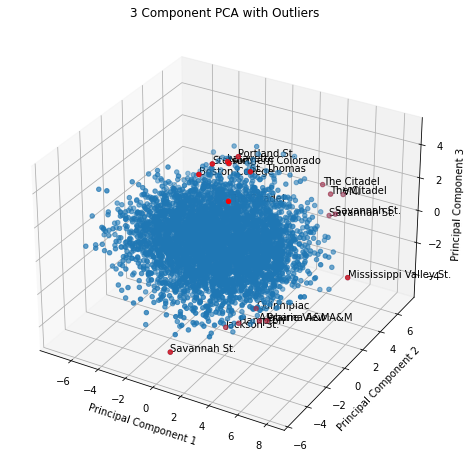

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
25,2014,Boston College,62.7157,331,61.2276,321,107.4730,105,114.2900,32,116.3700,345,111.8490,294,2.440890,142
543,2015,Lafayette,64.5845,189,64.5616,160,112.6540,19,112.9250,38,112.8320,344,115.0620,338,-2.136500,193
602,2015,Northern Colorado,64.1568,215,63.1568,247,113.0530,15,110.4210,63,114.2240,349,117.8750,349,-7.454160,252
679,2015,The Citadel,59.6214,342,58.5891,347,103.7270,134,103.2020,193,117.8650,351,121.7940,351,-18.591200,329
957,2017,Savannah St.,82.9977,1,81.0113,1,101.3610,217,100.6010,248,109.7270,306,114.7420,333,-14.141000,317
996,2017,The Citadel,80.6715,2,79.7419,2,104.4400,156,105.5190,150,116.0820,346,116.5450,340,-11.025800,288
1347,2016,The Citadel,80.6078,1,80.0417,1,103.1260,189,103.1010,201,116.3180,349,117.6100,346,-14.508400,312
1628,2012,Prairie View A&M,71.3914,23,70.0015,16,85.8993,339,85.5117,344,94.7858,56,103.5210,187,-18.009600,322
1956,2013,Savannah St.,62.9356,297,61.8038,286,86.1886,340,88.2264,337,86.7511,3,91.8086,22,-3.582220,208
2021,2013,Hampton,68.9391,52,68.7048,26,89.1159,329,89.1826,336,91.2553,17,99.3956,113,-10.213000,273


In [8]:
# Remove rows where tempo is 0 (didnt play)
data = data[data['Tempo'] != 0]

# Dropping non-numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA for three components
pca_3 = PCA(n_components=3)
pca_data_3 = pca_3.fit_transform(scaled_data)

# Standard deviations for outlier detection
std_devs = 3

# Identifying outliers
outliers = np.where(np.any(np.abs(pca_data_3) > std_devs * np.std(pca_data_3, axis=0), axis=1))

# Creating a 3D plot for the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three PCA components
ax.scatter(pca_data_3[:, 0], pca_data_3[:, 1], pca_data_3[:, 2])

# Highlighting outliers
ax.scatter(pca_data_3[outliers, 0], pca_data_3[outliers, 1], pca_data_3[outliers, 2], color='r')

# Annotate the outliers
for outlier in outliers[0]:
    ax.text(pca_data_3[outlier, 0], pca_data_3[outlier, 1], pca_data_3[outlier, 2], 
            '%s' % (data.iloc[outlier]['TeamName']), size=10, zorder=1, color='k')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3 Component PCA with Outliers')

plt.show()

# Displaying the details of outliers
data.iloc[outliers]